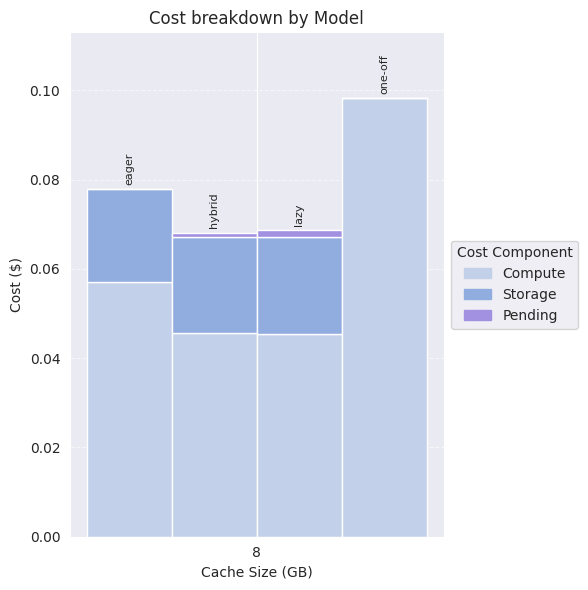

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results/wl1_gp3_2_to_32_with_pending/results.csv")
df = df.sort_values(by=["cache_size", "model"])
mask = df["cache_size"].isin([8])
df = df[mask]

models = df["model"].unique()
cache_sizes = sorted(df["cache_size"].unique())
bar_width = 0.01
x_ticks = list(range(len(cache_sizes)))
x_positions = {model: [i + idx * bar_width - bar_width*1.5 for i in x_ticks] for idx, model in enumerate(models)}

compute_color = "#c2d0e9"
storage_color = "#91acdf"
pending_color = "#a291e1"

fig, ax = plt.subplots(figsize=(6, 6))

for idx, model in enumerate(models):
    model_data = df[df["model"] == model]
    x_pos = x_positions[model]
    compute_vals = model_data["compute"].values
    storage_vals = model_data["storage"].values
    pending_vals = model_data["pending"].values

    ax.bar(x_pos, compute_vals, width=bar_width, color=compute_color)
    ax.bar(x_pos, storage_vals, width=bar_width, bottom=compute_vals, color=storage_color)
    ax.bar(x_pos, pending_vals, width=bar_width, bottom=compute_vals + storage_vals, color=pending_color)

    for x, c, s, p in zip(x_pos, compute_vals, storage_vals, pending_vals):
        total = c + s + p
        ax.text(x, total + 0.001, model, ha='center', va='bottom', fontsize=8, rotation=90)

handles = [
    plt.Rectangle((0, 0), 1, 1, color=compute_color, label="Compute"),
    plt.Rectangle((0, 0), 1, 1, color=storage_color, label="Storage"),
    plt.Rectangle((0, 0), 1, 1, color=pending_color, label="Pending")
]
ax.legend(handles=handles, title="Cost Component",
          loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0)

ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{size}" for size in cache_sizes])
ax.set_ylabel("Cost ($)")
ax.set_xlabel("Cache Size (GB)")
ax.set_title("Cost breakdown by Model")
ax.grid(axis="y", linestyle="--", alpha=0.6)
y_max = df["compute"].add(df["storage"]).max()
ax.set_ylim(0, y_max * 1.15)
plt.tight_layout()
plt.show()


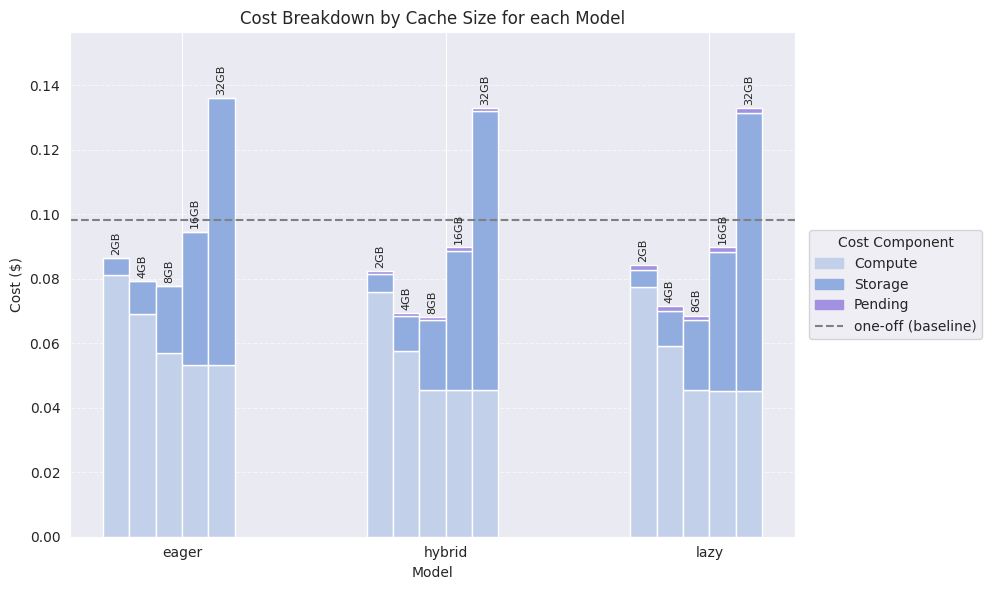

In [32]:
df = pd.read_csv("results/wl1_gp3_2_to_32_with_pending/results.csv")
df = df.sort_values(by=["cache_size", "model"])
mask = df["cache_size"].isin([2, 4, 8, 16, 32])
mask2 = df["model"] == "one-off"
baseline_df = df[mask2]
df = df[mask & ~mask2]

models = df["model"].unique()
cache_sizes = sorted(df["cache_size"].unique())
bar_width = 0.1
x_ticks = list(range(len(models)))
x_positions = {size: [i + idx * bar_width - bar_width * (len(cache_sizes)/2) for i in x_ticks]
               for idx, size in enumerate(cache_sizes)}

compute_color = "#c2d0e9"
storage_color = "#91acdf"
pending_color = "#a291e1"

fig, ax = plt.subplots(figsize=(10, 6))

for idx, cache_size in enumerate(cache_sizes):
    cache_data = df[df["cache_size"] == cache_size]
    x_pos = x_positions[cache_size]
    compute_vals = cache_data["compute"].values
    storage_vals = cache_data["storage"].values
    pending_vals = cache_data["pending"].values
    model_labels = cache_data["model"].values


    ax.bar(x_pos, compute_vals, width=bar_width, color=compute_color)
    ax.bar(x_pos, storage_vals, width=bar_width, bottom=compute_vals, color=storage_color)
    ax.bar(x_pos, pending_vals, width=bar_width, bottom=compute_vals + storage_vals, color=pending_color)

    for x, c, s, p in zip(x_pos, compute_vals, storage_vals, pending_vals):
        total = c + s + p
        ax.text(x, total + 0.001, f"{cache_size}GB", ha='center', va='bottom', fontsize=8, rotation=90)

baseline_value = baseline_df["compute"].values + baseline_df["storage"].values
baseline_avg = baseline_value.mean()

ax.axhline(y=baseline_avg, color="gray", linestyle="--", label="one-off (baseline)")

handles = [
    plt.Rectangle((0, 0), 1, 1, color=compute_color, label="Compute"),
    plt.Rectangle((0, 0), 1, 1, color=storage_color, label="Storage"),
    plt.Rectangle((0, 0), 1, 1, color=pending_color, label="Pending"),
    plt.Line2D([0], [0], color='gray', linestyle='--', label='one-off (baseline)')
]
ax.legend(handles=handles, title="Cost Component", loc="center left",
          bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

ax.set_xticks(x_ticks)
ax.set_xticklabels(models)
ax.set_ylabel("Cost ($)")
ax.set_xlabel("Model")
ax.set_title("Cost Breakdown by Cache Size for each Model")
ax.grid(axis="y", linestyle="--", alpha=0.6)

y_max = df["compute"].add(df["storage"]).max()
ax.set_ylim(0, y_max * 1.15)

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # space for legend
plt.show()
